## Mutual Information

In this notebook I present a feature selection analysis. 

### **Mutual Information (MI) for Feature Selection**  
**Mutual Information** measures the **statistical dependence** between two variables, capturing **both linear and nonlinear relationships**. Unlike Pearson correlation (which only detects linear trends), MI quantifies how much knowing one variable reduces uncertainty about the other.  

#### **Mathematical Definition**  
For two continuous variables \( X \) and \( Y \):  

$\text{MI}(X, Y) = \iint p(x, y) \log \left( \frac{p(x, y)}{p(x)p(y)} \right) dx \, dy$  
where:  
- $( p(x, y) )$ = joint probability density.  
- $( p(x), p(y) )$ = marginal densities.  

**Key Properties**:  
- $MI (\geq 0)$ (0 means independent).  
- Higher MI = stronger dependency.  

---

### **How are we gonna use it for Feature Selection?**  
MI ranks molecular descriptors by their predictive power for biological activity, even if the relationship is nonlinear (e.g., parabolic, logarithmic).  

#### **Python Example**  
```python
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

# Generate synthetic QSAR data (replace with your data)
np.random.seed(42)
X = pd.DataFrame({
    'Desc1': np.random.normal(0, 1, 100),           # Noise (low MI)
    'Desc2': np.random.uniform(0, 10, 100),         # Noise (low MI)
    'Desc3': np.log(np.abs(np.random.normal(0, 5, 100)) + 0.5 * np.random.randn(100),  # Nonlinear relationship
    'Desc4': 0.3 * np.random.randn(100) + 0.7 * np.random.randn(100)**2  # Quadratic relationship
})
y = X['Desc3'] + X['Desc4']**2 + np.random.normal(0, 0.1, 100)  # Activity (nonlinear dependency)

# Compute Mutual Information
mi_scores = mutual_info_regression(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores}).sort_values('MI_Score', ascending=False)

# Plot MI Scores
plt.figure(figsize=(8, 4))
plt.barh(mi_df['Feature'], mi_df['MI_Score'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title('Feature Importance (Nonlinear Relationships)')
plt.gca().invert_yaxis()  # Highest MI on top
plt.show()

# Select top-k features
top_features = mi_df.head(2)['Feature'].values
print(f"Top predictive descriptors: {top_features}")
```

#### **Output Interpretation**  
- **Desc3** and **Desc4** will have the highest MI scores because they have nonlinear relationships with `y`.  
- **Desc1** and **Desc2** (noise) will have MI ≈ 0.  

---

### **When to Use MI**  
1. **QSAR/Cheminformatics**: When descriptors may interact nonlinearly (e.g., hydrophobicity vs. activity).  
2. **High-Dimensional Data**: Prioritize features before training models (Random Forest, SVM, etc.).  
3. **Exploratory Analysis**: Discover hidden relationships missed by linear metrics.  

**Note**: For categorical activity (classification), use `mutual_info_classif` instead.  


## Used libraries

In [1]:
colab = False 
if colab: 
    import sys
    sys.path.append('/content/drive/MyDrive/Colaboracion_Quimica/Main_Codes/AutoEncoders/AmaroX/AmaroX')
    ! pip install python-telegram-bot

    from ai_functions import *
    from ai_models import *
    from utilities import *
    from data_manipulation import *
    import pandas as pd
else: 
    from AmaroX.AmaroX.ai_functions import *
    from AmaroX.AmaroX.ai_models import *
    from AmaroX.AmaroX.utilities import *
    from AmaroX.AmaroX.data_manipulation import *
    import pandas as pd
    import seaborn as sns

2025-08-18 15:04:13.054839: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-18 15:04:14.594707: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/alan-amaro/miniconda3/envs/farma/lib/python3.9/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


## Data

The data presented here corresponds to molecules with their SMILE representation and descriptors, along with the biological activity. Let's first do a quick view of the data shape.

* All the data presented here was obtained by colaboration with Dr. Erick Padilla at Facultad de Estudios Superiores Zaragoza - UNAM.

### Downloading the data

In [2]:
if colab:
    ! gdown --id 1cHM9neEhTOZ82UU9HaZkdGdlwE1d4SJT
    ! gdown --id 1wZp9pou63ElEYyGGjBeC2pDtscgRgCpj

In [3]:
compounds_md = pd.read_csv("/media/alan-amaro/XicoDisk/Data_Farma_FESZ/Alzheimer/Data/AZH_descriptors_1.csv", low_memory = False)

In [4]:
compounds_md.head(15)

,QED,MolWt,LogP,HAC,RB,TPSA,HBA,HDB,Activity,SMILES,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0.197668,578.805,6.51442,43,11,73.39,6,2,1,Cc1c(N2CCN(C)CC2)nc2ccccc2c1C(=O)NCCCCCCCNc1c2...,...,10.752719,80.685788,578.373310,6.498577,8198,73,228.0,271.0,11.194444,9.527778
1,0.385319,358.442,3.10360,26,10,89.32,6,2,1,O=[N+]([O-])OCCCNCCCNc1c2c(nc3ccccc13)CCCC2,...,10.024687,60.503050,358.200491,6.888471,2030,37,128.0,146.0,7.166667,5.944444
2,0.653235,310.485,5.80432,23,7,24.92,2,1,1,CCCCCCCNc1c2c(nc3cc(C)ccc13)CCCC2,...,10.023091,57.201662,310.240899,5.853602,1270,35,116.0,135.0,6.416667,5.277778
3,0.038102,638.884,7.00050,48,14,104.90,6,5,1,Nc1ccc2c(c1)c(-c1ccccc1)[n+](CCCNCCCNCCCNc1c3c...,...,10.891894,86.295898,638.396571,6.649964,11190,82,256.0,305.0,11.555556,10.638889
4,0.154825,595.618,10.01430,42,10,49.84,4,2,1,Clc1ccc2c(NCCCCCCCNc3c4c(nc5cc(Cl)ccc35)-c3ccc...,...,10.824308,94.181450,594.231703,7.618355,7479,73,232.0,280.0,10.055556,9.111111
5,0.225750,468.645,6.31620,35,11,69.81,3,3,1,O=C(CCc1c[nH]c2ccccc12)NCCCCCCNc1c2c(nc3ccccc1...,...,10.416581,85.301759,468.288912,6.595618,4995,53,182.0,213.0,8.250000,7.833333
6,0.227092,497.687,5.46780,37,12,73.05,4,3,1,CN(CCCNC(=O)CCc1c[nH]c2ccccc12)CCCNc1c2c(nc3cc...,...,10.457459,87.547641,497.315461,6.543624,5811,56,192.0,224.0,9.361111,8.250000
7,0.228277,503.090,7.05110,36,10,58.95,4,2,1,Cn1cc(C(=O)NCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3...,...,10.529185,86.975712,502.249939,7.073943,5222,58,190.0,225.0,9.722222,7.972222
8,0.094773,631.817,9.68800,47,14,72.90,7,1,0,COc1cccc2cc(CN(CCCCCCNc3c4c(nc5ccccc35)CCCCC4)...,...,10.774300,101.181175,631.341007,6.862402,9700,79,252.0,300.0,11.305556,10.472222
9,0.138447,602.779,7.27780,45,13,85.25,6,2,1,COc1ccc(Cn2cc(C(=O)NCCCCCCCNc3c4c(nc5ccccc35)C...,...,10.753019,82.795526,602.325691,6.923284,9506,75,236.0,279.0,11.694444,10.083333


In [5]:
y = compounds_md["pChEMBL Value"]
y.shape

(5254,)

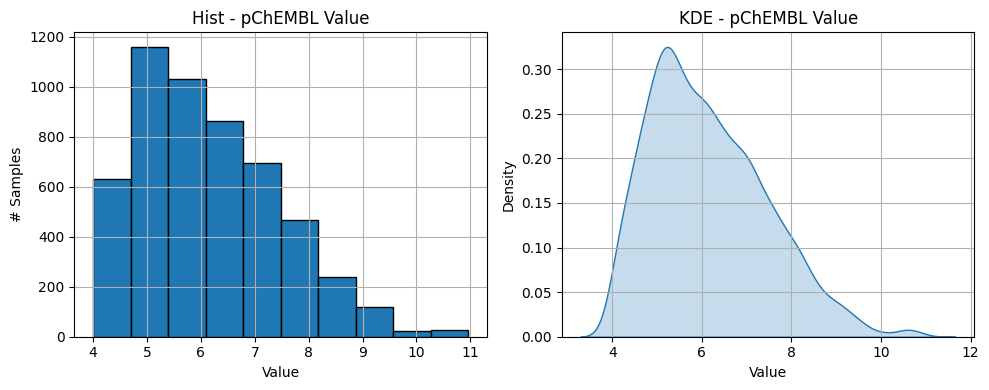

In [6]:
# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# First plot
ax1.hist(y, bins = 10, edgecolor = 'black')
ax1.set_title('Hist - pChEMBL Value')
ax1.set_xlabel('Value')
ax1.set_ylabel('# Samples')
ax1.grid()

# Second plot
sns.kdeplot(y, ax = ax2, fill = True)
ax2.set_title('KDE - pChEMBL Value')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.grid()

plt.tight_layout()
plt.show()


In [7]:
df_x_ = compounds_md.copy()
df_x_ = df_x_.drop('Activity', axis=1) # Este renglón puede ser útil #Opción 2
df_x_ = df_x_.drop('pChEMBL Value', axis=1)
df_x_ = df_x_.drop('Cluster_number', axis=1)
df_x_ = df_x_.select_dtypes("number")  # quitar non_numeric

In [8]:
df_x_.shape

(5254, 1197)

In [9]:
x = np.array(df_x_)
x.shape

(5254, 1197)

## Applying Mutual Information to Molecular Descriptors

* When applying mutual information regression to two arrays x and y, normalization is not strictly necessary because mutual information is a non-parametric measure that estimates the dependency between variables based on their probability distributions, not their absolute magnitudes.

In [10]:
x.shape, y.shape

((5254, 1197), (5254,))

In [11]:
df_x_

,QED,MolWt,LogP,HAC,RB,TPSA,HBA,HDB,nAcid,nBase,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0.197668,578.805,6.51442,43,11,73.39,6,2,0,1,...,10.752719,80.685788,578.373310,6.498577,8198,73,228.0,271.0,11.194444,9.527778
1,0.385319,358.442,3.10360,26,10,89.32,6,2,0,1,...,10.024687,60.503050,358.200491,6.888471,2030,37,128.0,146.0,7.166667,5.944444
2,0.653235,310.485,5.80432,23,7,24.92,2,1,0,0,...,10.023091,57.201662,310.240899,5.853602,1270,35,116.0,135.0,6.416667,5.277778
3,0.038102,638.884,7.00050,48,14,104.90,6,5,0,3,...,10.891894,86.295898,638.396571,6.649964,11190,82,256.0,305.0,11.555556,10.638889
4,0.154825,595.618,10.01430,42,10,49.84,4,2,0,0,...,10.824308,94.181450,594.231703,7.618355,7479,73,232.0,280.0,10.055556,9.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5249,0.346302,318.325,2.17400,23,7,93.06,6,2,0,0,...,9.808572,70.652630,318.110338,7.758789,1354,32,112.0,128.0,8.527778,5.333333
5250,0.564648,348.446,3.70850,26,5,62.82,3,1,0,0,...,10.177970,60.954139,348.183778,6.963676,1810,41,134.0,156.0,9.000000,5.722222
5251,0.497332,124.163,0.51970,9,1,13.11,1,0,0,1,...,8.689296,37.472182,124.075690,6.530299,86,10,40.0,44.0,3.472222,2.194444
5252,0.131806,686.982,7.59140,50,21,83.14,6,2,0,2,...,10.685126,103.877223,686.477106,6.129260,16155,73,254.0,294.0,12.333333,11.305556


Mutual Information is a function provided by SKLearn:

In [12]:
from sklearn.feature_selection import mutual_info_regression

In [13]:
mi_scores = mutual_info_regression(
    df_x_, y, random_state= 1360
)
mi_df = pd.DataFrame({'Feature': df_x_.columns, 'MI_Score': mi_scores}).sort_values('MI_Score', ascending=False)

In [14]:
mi_df.head(n = 10)

,Feature,MI_Score
444,BCUTZ-1l,0.246260
454,BCUTare-1l,0.234368
450,BCUTse-1l,0.233397
446,BCUTm-1l,0.230890
452,BCUTpe-1l,0.229991
442,BCUTs-1l,0.224215
11,SpMax_A,0.208303
12,SpDiam_A,0.206119
935,SlogP_VSA3,0.203438
439,BCUTd-1h,0.201971


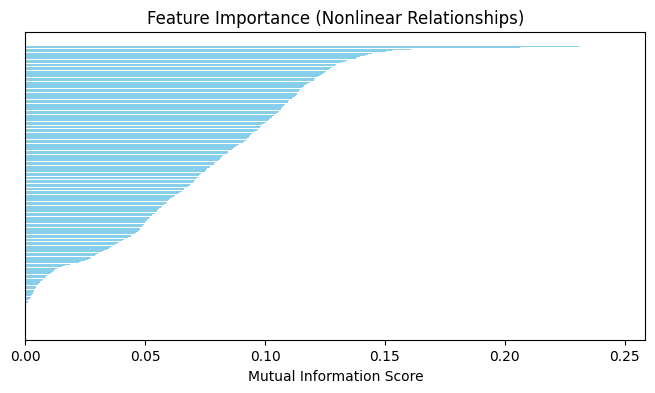

In [15]:
# Plot MI Scores
plt.figure(figsize=(8, 4))
plt.barh(mi_df['Feature'], mi_df['MI_Score'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title('Feature Importance (Nonlinear Relationships)')
plt.gca().invert_yaxis()  # Highest MI on top
plt.yticks([])  # This removes y-axis labels entirely
plt.show()

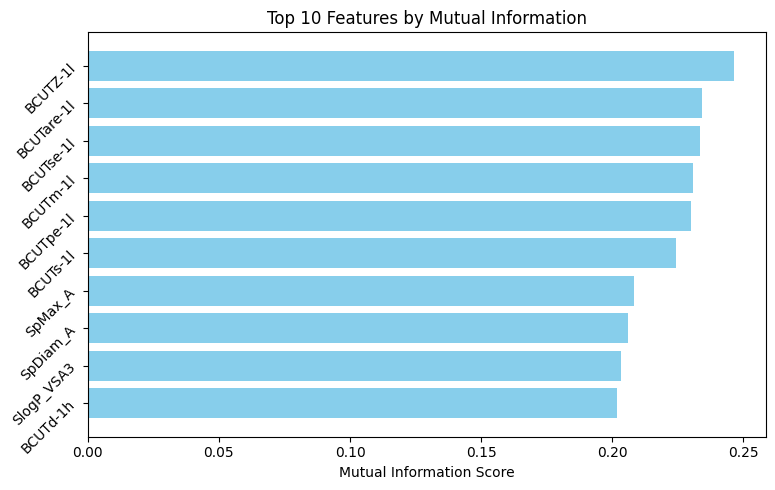

In [16]:
top_n = 10  # Adjust as needed
mi_df_top = mi_df.head(top_n)  # Select top N features

plt.figure(figsize=(8, 5))
plt.barh(mi_df_top['Feature'], mi_df_top['MI_Score'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title(f'Top {top_n} Features by Mutual Information')
plt.gca().invert_yaxis()  # Highest MI on top
plt.tight_layout()
plt.yticks(rotation = 45)
plt.show()

In [17]:
# Select top-k features
top_features = mi_df.head(10)['Feature'].values
print(f"Top predictive descriptors: {top_features}")

Top predictive descriptors: ['BCUTZ-1l' 'BCUTare-1l' 'BCUTse-1l' 'BCUTm-1l' 'BCUTpe-1l' 'BCUTs-1l'
 'SpMax_A' 'SpDiam_A' 'SlogP_VSA3' 'BCUTd-1h']


## Plot the most MI-Correlated Descriptors with the BA

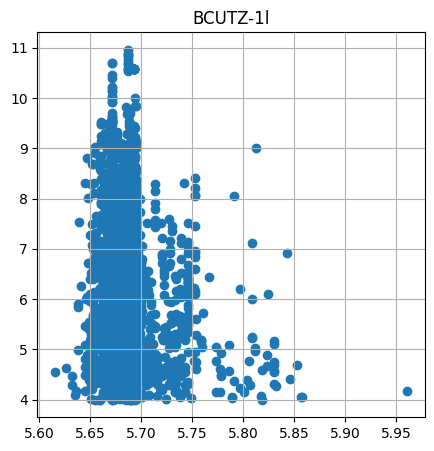

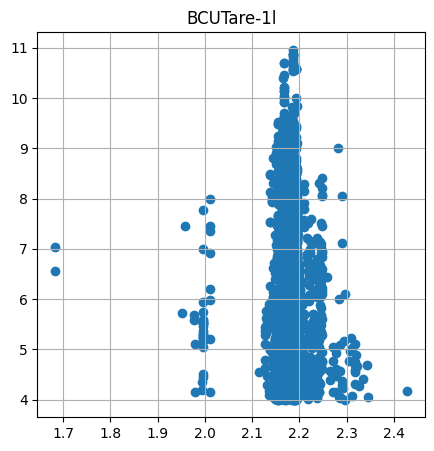

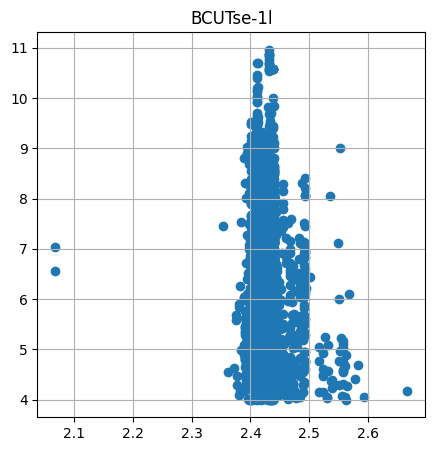

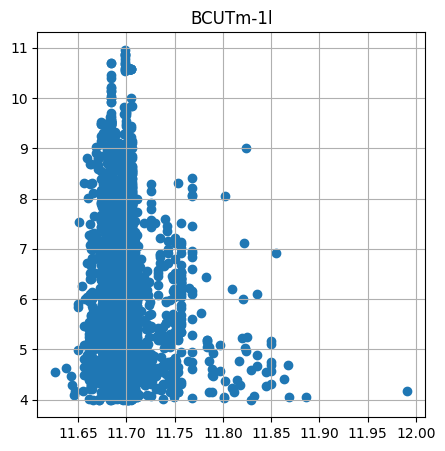

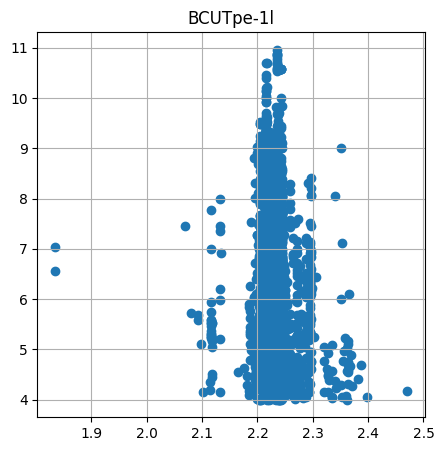

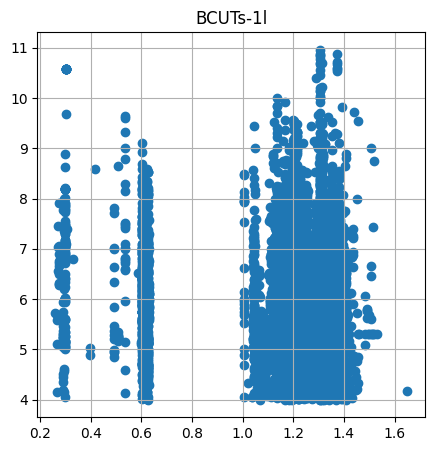

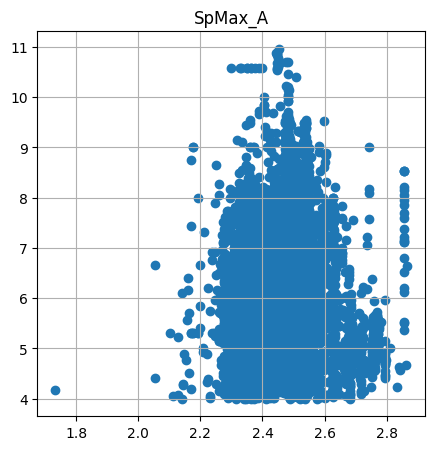

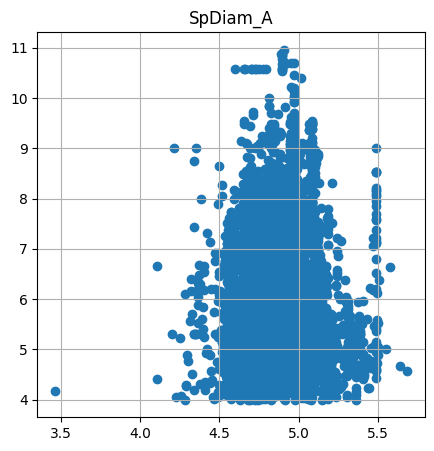

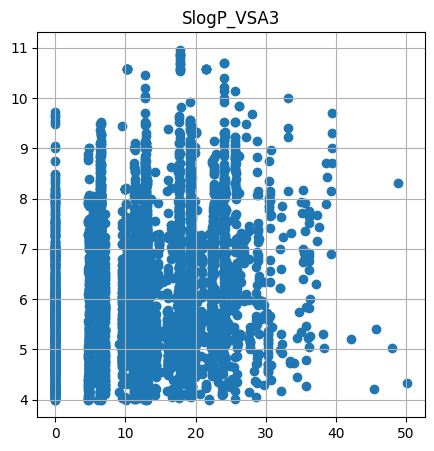

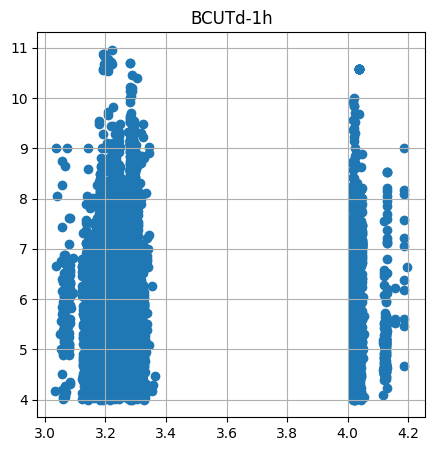

In [18]:
for top in top_features:
  plt.figure(figsize = (5,5))
  plt.scatter(df_x_[top], y)
  plt.grid()
  plt.title(top)
  plt.show()

## Plot the MI Function

In [19]:
from scipy.stats import gaussian_kde

In [20]:
# Compute KDE for joint and marginals
xy = np.vstack([df_x_[top_features[0]], y])
joint_kde = gaussian_kde(xy)(xy)
x_kde = gaussian_kde(df_x_[top_features[0]])(df_x_[top_features[0]])
y_kde = gaussian_kde(y)(y)

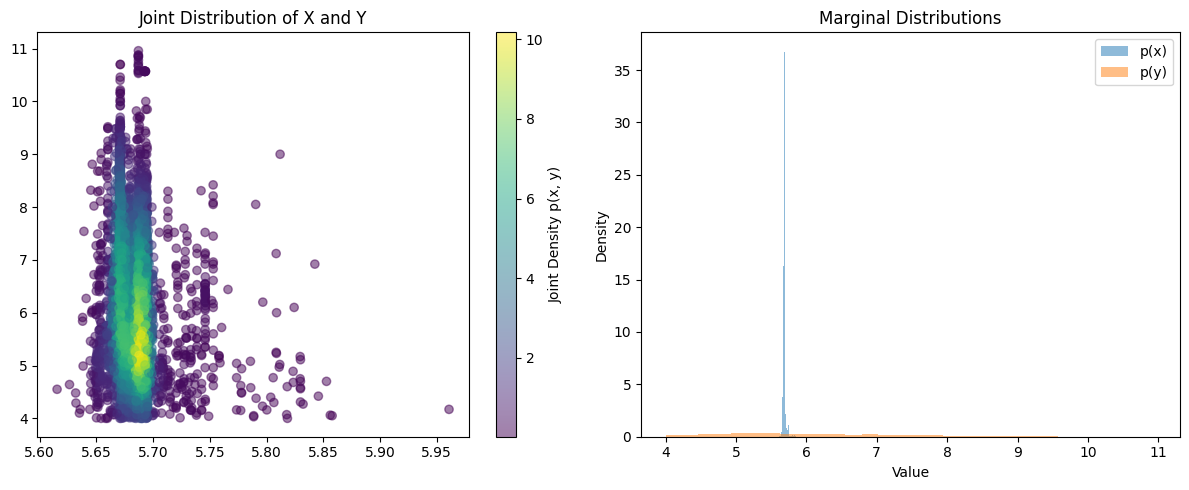

In [21]:
plt.figure(figsize=(12, 5))

# Plot Joint Distribution (scatter with KDE coloring)
plt.subplot(1, 2, 1)
plt.scatter(df_x_[top_features[0]], y, c=joint_kde, cmap='viridis', alpha=0.5)
plt.colorbar(label='Joint Density p(x, y)')
plt.title('Joint Distribution of X and Y')

# Plot Marginal Distributions
plt.subplot(1, 2, 2)
plt.hist(df_x_[top_features[0]], bins=30, density=True, alpha=0.5, label='p(x)')
plt.hist(y, bins=30, density=True, alpha=0.5, label='p(y)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Marginal Distributions')
plt.legend()

#plt.suptitle(f"Mutual Information I(X; Y) = {mi[0]:.4f}", y=1.05)
plt.tight_layout()
plt.show()

## Select the most relevant features given by MI

In [22]:
mi_df.head()

,Feature,MI_Score
444,BCUTZ-1l,0.246260
454,BCUTare-1l,0.234368
450,BCUTse-1l,0.233397
446,BCUTm-1l,0.230890
452,BCUTpe-1l,0.229991


In [23]:
mi_df.shape

(1197, 2)

In [24]:
mi_df_greater = mi_df[ mi_df['MI_Score']>=0.12  ]
mi_df_greater.shape

(150, 2)

for i in mi_df_greater['Feature'].tolist():
  print( "'{}',".format(i))

In [25]:
# Compute MI between all descriptor pairs
mi_matrix = pd.DataFrame(index= mi_df_greater['Feature'].tolist() , columns= mi_df_greater['Feature'].tolist() )
columns = mi_df_greater['Feature'].tolist()

for i in range(len(columns)):
    for j in range(len(columns)):
        if (i>j) and (i!=j): 
            
            mi_matrix.loc[ columns[i], columns[j] ] = mutual_info_regression(
                np.expand_dims(df_x_[columns[i]], axis = -1),
                df_x_[columns[j]])[0]

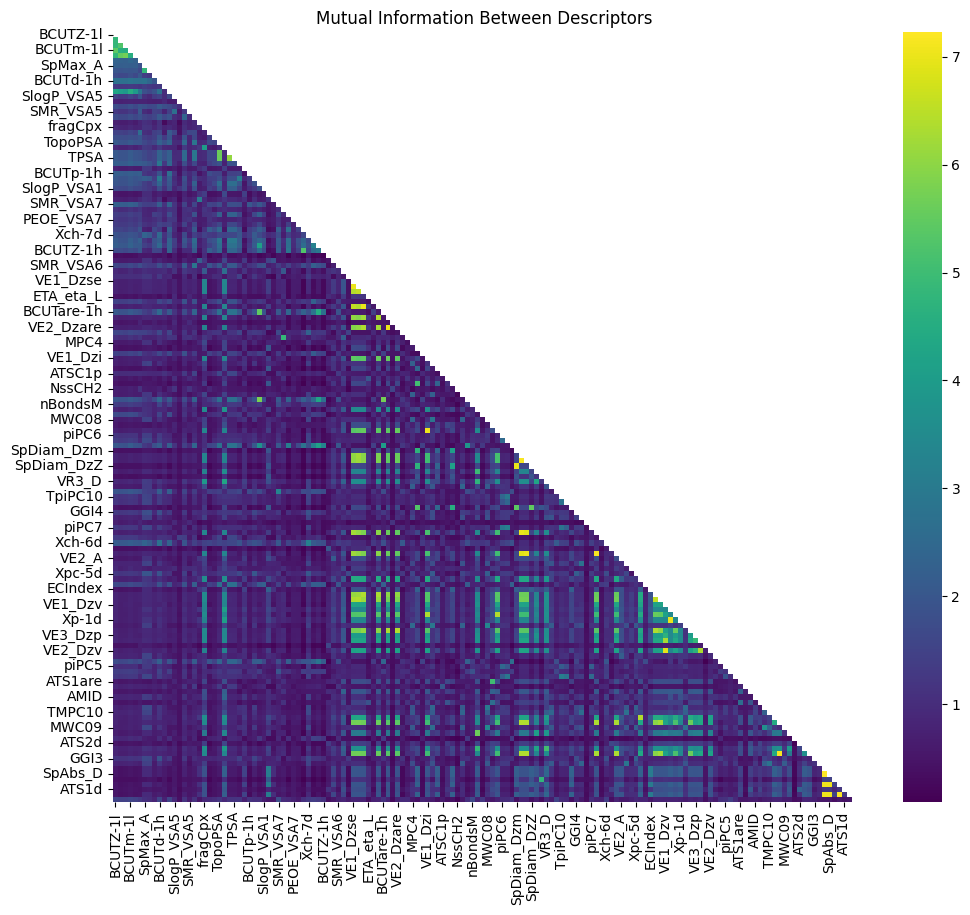

In [26]:
# Plot MI matrix
plt.figure(figsize=(12, 10))
sns.heatmap(mi_matrix.astype(float), cmap='viridis')
plt.title("Mutual Information Between Descriptors")
plt.savefig('./mi.png')
plt.show()

In [28]:
mi_matrix.to_pickle('./mi_150.pkl')

In [29]:
for i in range(len(columns)):
    for j in range(len(columns)):
        if (i<j): 
            mi_matrix.loc[ columns[i], columns[j] ] =  mi_matrix.loc[ columns[j], columns[i] ]
        elif (i==j):
            mi_matrix.loc[ columns[i], columns[j] ] = 10

In [30]:
mi_matrix.to_pickle('./mi_150_full.pkl')

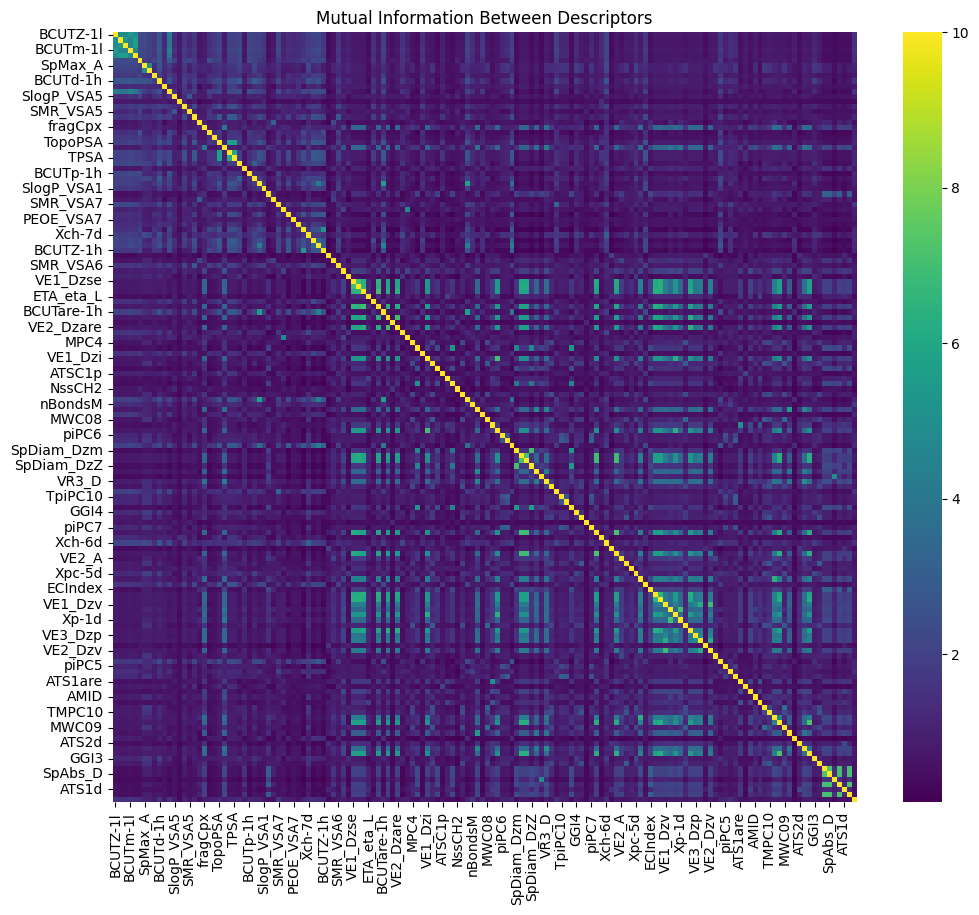

In [31]:
# Plot MI matrix
plt.figure(figsize=(12, 10))
sns.heatmap(mi_matrix.astype(float), cmap='viridis')
plt.title("Mutual Information Between Descriptors")
plt.savefig('./mi_full.png')
plt.show()

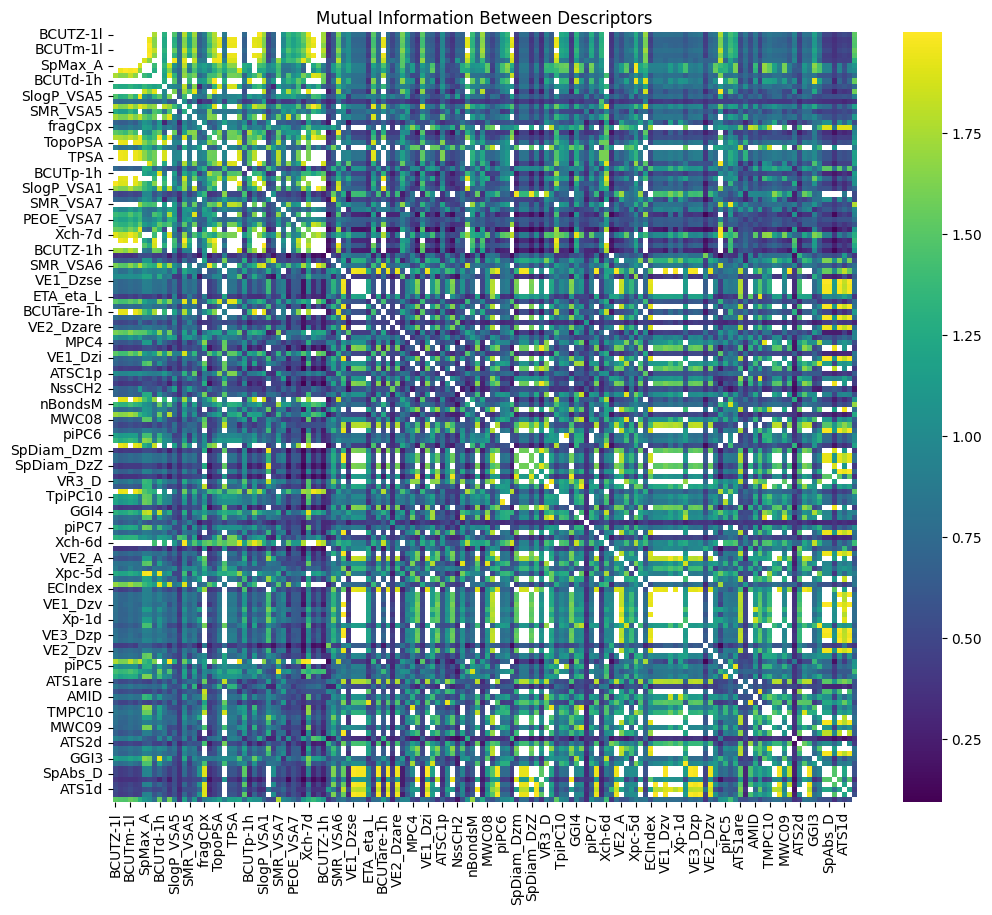

In [32]:
# Plot MI matrix
mi_matrix_less = mi_matrix[ mi_matrix <= 2]
plt.figure(figsize=(12, 10))
sns.heatmap(mi_matrix_less.astype(float), cmap='viridis')
plt.title("Mutual Information Between Descriptors")
plt.show()

## Selecting Independent Variables

In [13]:
mi_matrix = pd.read_pickle('./mi_150_full.pkl')

In [14]:
mi_matrix.shape

(150, 150)

In [15]:
most_correlated_descriptor = mi_matrix.columns.tolist()[0]
most_correlated_descriptor

'BCUTZ-1l'

In [16]:
names = mi_matrix.columns.to_list()

In [17]:
names[mi_matrix[most_correlated_descriptor].argmin()]

'Xp-4dv'

In [18]:
descrip = [
    most_correlated_descriptor, 
    names[mi_matrix[most_correlated_descriptor].argmin()]
]
descrip

['BCUTZ-1l', 'Xp-4dv']

In [19]:
while len(descrip)<20:
    _sum = 0
    for des in descrip:
        _sum += mi_matrix[des]

    if names[_sum.argmin()] in descrip:
        break
    else: 
        descrip.append(names[_sum.argmin()])
        print('Se ha añadido: ', names[_sum.argmin()])

Se ha añadido:  SpMAD_Dzpe
Se ha añadido:  SlogP_VSA10
Se ha añadido:  VR2_A
Se ha añadido:  VSA_EState7
Se ha añadido:  ATSC1i
Se ha añadido:  SssNH
Se ha añadido:  NssCH2
Se ha añadido:  Xpc-5dv
Se ha añadido:  SlogP_VSA8
Se ha añadido:  ATS1d
Se ha añadido:  VE1_A
Se ha añadido:  SssCH2
Se ha añadido:  Xp-7dv
Se ha añadido:  BCUTm-1h
Se ha añadido:  SpDiam_Dzv
Se ha añadido:  piPC6
Se ha añadido:  VSA_EState3
Se ha añadido:  ETA_eta_L


In [20]:
descrip

['BCUTZ-1l',
 'Xp-4dv',
 'SpMAD_Dzpe',
 'SlogP_VSA10',
 'VR2_A',
 'VSA_EState7',
 'ATSC1i',
 'SssNH',
 'NssCH2',
 'Xpc-5dv',
 'SlogP_VSA8',
 'ATS1d',
 'VE1_A',
 'SssCH2',
 'Xp-7dv',
 'BCUTm-1h',
 'SpDiam_Dzv',
 'piPC6',
 'VSA_EState3',
 'ETA_eta_L']

In [23]:
mi_matrix_sub = pd.DataFrame(index= descrip, columns= descrip )
for i in descrip:
    for j in descrip:
        mi_matrix_sub.loc[i, j] = mutual_info_regression(
            np.expand_dims(df_x_[i], axis = -1),
            df_x_[j])[0]

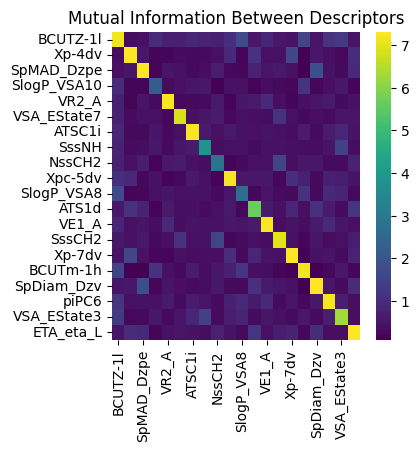

In [24]:
# Plot MI matrix
plt.figure(figsize=(4, 4))
sns.heatmap(mi_matrix_sub.astype(float), cmap='viridis')
plt.title("Mutual Information Between Descriptors")
#plt.savefig('./mi.png')
plt.show()

## Plotting

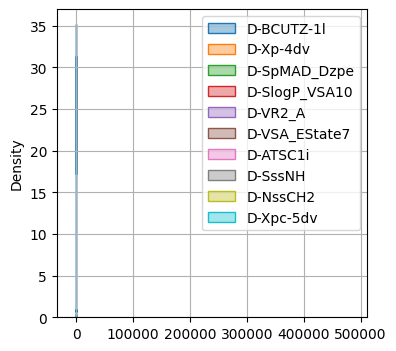

In [46]:
plt.figure(figsize = (4,4))
for des in descrip:
  #plt.hist(df_x_[des], label = 'D-{}'.format(des), edgecolor = 'black')
  sns.kdeplot(df_x_[des], fill=True, alpha=0.4, label = 'D-{}'.format(des))

plt.legend()
plt.grid()
plt.ylabel('Density')
plt.xlabel('')
plt.show()

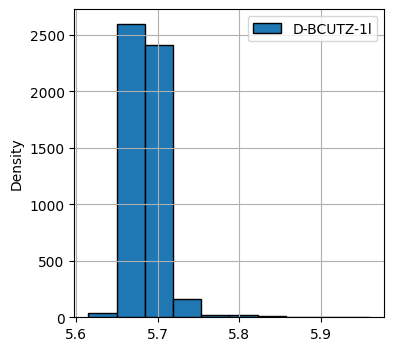

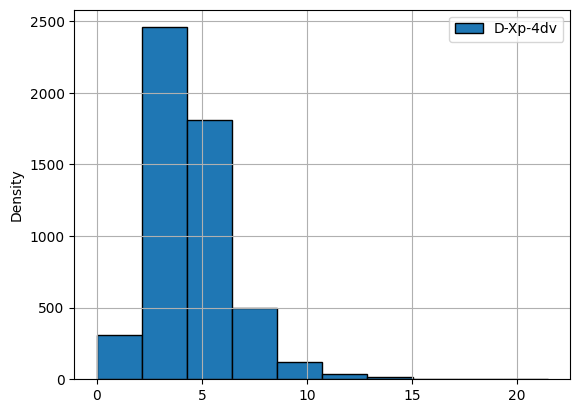

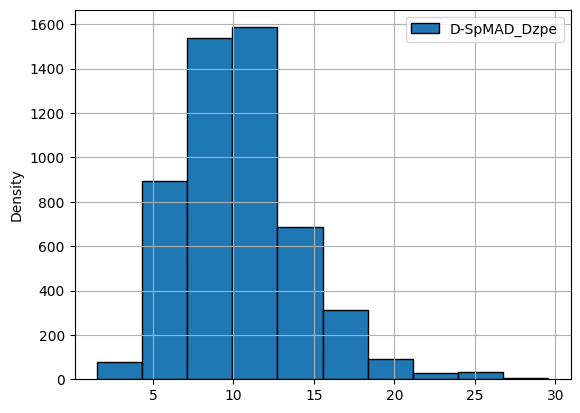

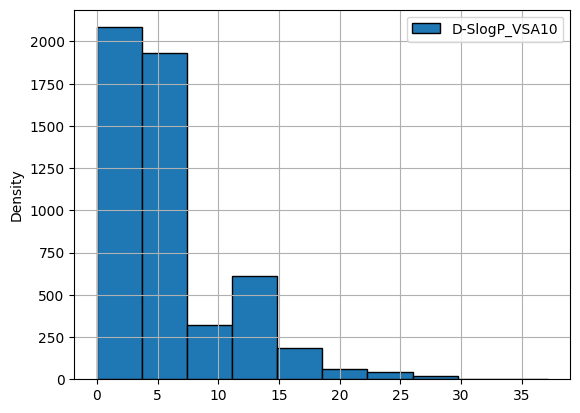

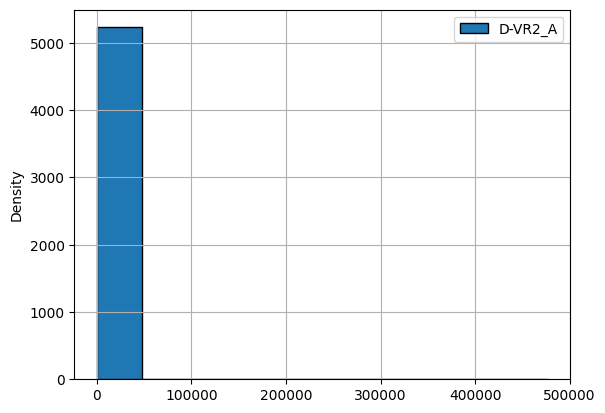

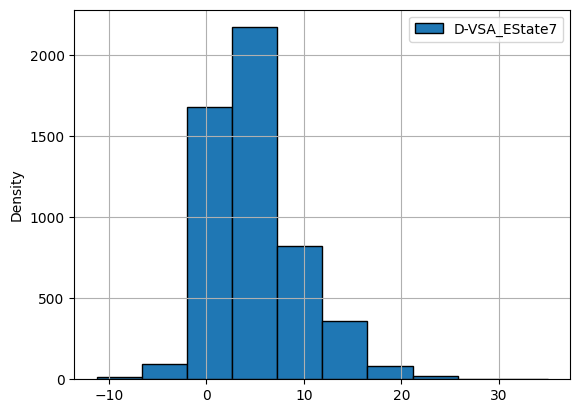

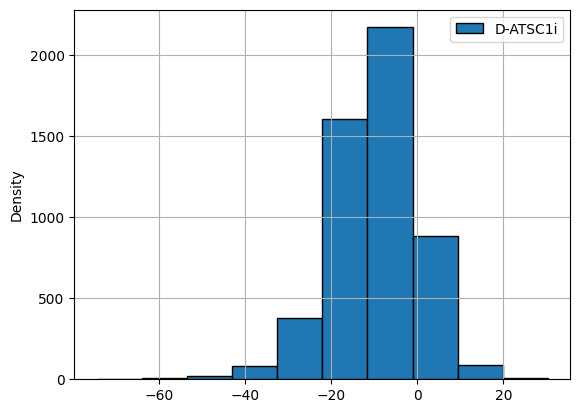

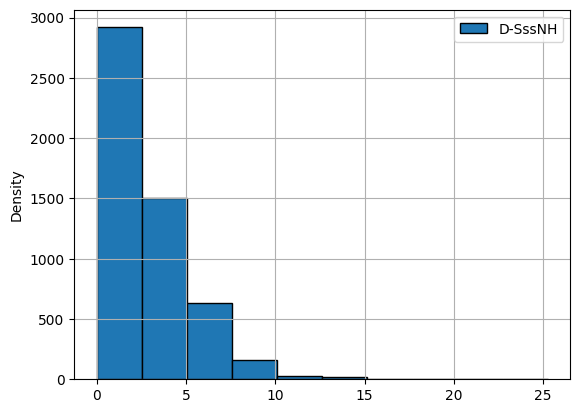

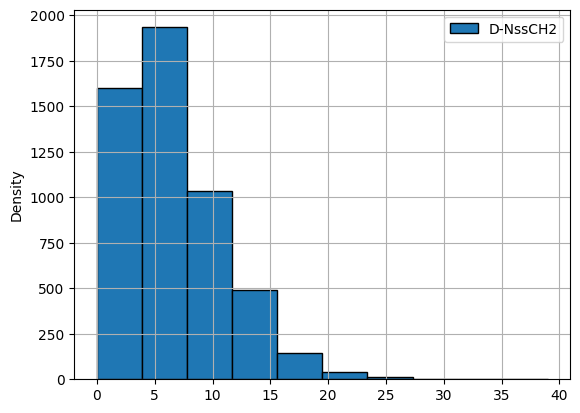

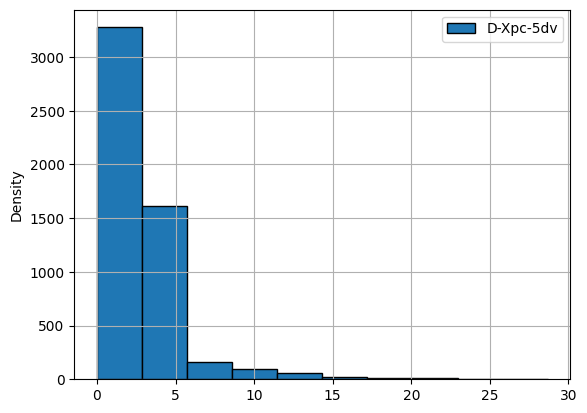

In [47]:
plt.figure(figsize = (4,4))
for des in descrip:
    plt.hist(df_x_[des], label = 'D-{}'.format(des), edgecolor = 'black')
  #sns.kdeplot(df_x_[des], fill=True, alpha=0.4, label = 'D-{}'.format(des))

    plt.legend()
    plt.grid()
    plt.ylabel('Density')
    plt.xlabel('')
    plt.show()